In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.linear_model import LinearRegression, SGDRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, AdaBoostRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score
from xgboost import XGBRegressor
from sklearn.svm import SVR
import warnings
warnings.filterwarnings('ignore') 

In [2]:
data = pd.read_csv(r'C:\Users\asus 1\Desktop\Fliprobo\Machine learning projects\temperature.csv')

In [3]:
data.head()

,station,Date,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,...,LDAPS_PPT2,LDAPS_PPT3,LDAPS_PPT4,lat,lon,DEM,Slope,Solar radiation,Next_Tmax,Next_Tmin
0,1.0,30-06-2013,28.7,21.4,58.255688,91.116364,28.074101,23.006936,6.818887,69.451805,...,0.0,0.0,0.0,37.6046,126.991,212.3350,2.7850,5992.895996,29.1,21.2
1,2.0,30-06-2013,31.9,21.6,52.263397,90.604721,29.850689,24.035009,5.691890,51.937448,...,0.0,0.0,0.0,37.6046,127.032,44.7624,0.5141,5869.312500,30.5,22.5
2,3.0,30-06-2013,31.6,23.3,48.690479,83.973587,30.091292,24.565633,6.138224,20.573050,...,0.0,0.0,0.0,37.5776,127.058,33.3068,0.2661,5863.555664,31.1,23.9
3,4.0,30-06-2013,32.0,23.4,58.239788,96.483688,29.704629,23.326177,5.650050,65.727144,...,0.0,0.0,0.0,37.6450,127.022,45.7160,2.5348,5856.964844,31.7,24.3
4,5.0,30-06-2013,31.4,21.9,56.174095,90.155128,29.113934,23.486480,5.735004,107.965535,...,0.0,0.0,0.0,37.5507,127.135,35.0380,0.5055,5859.552246,31.2,22.5


In [4]:
data.shape

(7752, 25)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7752 entries, 0 to 7751
Data columns (total 25 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   station           7750 non-null   float64
 1   Date              7750 non-null   object 
 2   Present_Tmax      7682 non-null   float64
 3   Present_Tmin      7682 non-null   float64
 4   LDAPS_RHmin       7677 non-null   float64
 5   LDAPS_RHmax       7677 non-null   float64
 6   LDAPS_Tmax_lapse  7677 non-null   float64
 7   LDAPS_Tmin_lapse  7677 non-null   float64
 8   LDAPS_WS          7677 non-null   float64
 9   LDAPS_LH          7677 non-null   float64
 10  LDAPS_CC1         7677 non-null   float64
 11  LDAPS_CC2         7677 non-null   float64
 12  LDAPS_CC3         7677 non-null   float64
 13  LDAPS_CC4         7677 non-null   float64
 14  LDAPS_PPT1        7677 non-null   float64
 15  LDAPS_PPT2        7677 non-null   float64
 16  LDAPS_PPT3        7677 non-null   float64


In [6]:
missing_values=data.isnull().sum()
percent_missing_values=(missing_values/len(data))*100
print(pd.concat([missing_values, percent_missing_values], axis=1, keys=['Missing Values', '% Missing Data']))

                  Missing Values  % Missing Data
station                        2        0.025800
Date                           2        0.025800
Present_Tmax                  70        0.902993
Present_Tmin                  70        0.902993
LDAPS_RHmin                   75        0.967492
LDAPS_RHmax                   75        0.967492
LDAPS_Tmax_lapse              75        0.967492
LDAPS_Tmin_lapse              75        0.967492
LDAPS_WS                      75        0.967492
LDAPS_LH                      75        0.967492
LDAPS_CC1                     75        0.967492
LDAPS_CC2                     75        0.967492
LDAPS_CC3                     75        0.967492
LDAPS_CC4                     75        0.967492
LDAPS_PPT1                    75        0.967492
LDAPS_PPT2                    75        0.967492
LDAPS_PPT3                    75        0.967492
LDAPS_PPT4                    75        0.967492
lat                            0        0.000000
lon                 

In [7]:
#missing values present are less than 1% so we can drop the missing values data from the dataset

In [8]:
data.dropna(inplace=True)
data.shape

(7588, 25)

In [9]:
data.isnull().sum()

station             0
Date                0
Present_Tmax        0
Present_Tmin        0
LDAPS_RHmin         0
LDAPS_RHmax         0
LDAPS_Tmax_lapse    0
LDAPS_Tmin_lapse    0
LDAPS_WS            0
LDAPS_LH            0
LDAPS_CC1           0
LDAPS_CC2           0
LDAPS_CC3           0
LDAPS_CC4           0
LDAPS_PPT1          0
LDAPS_PPT2          0
LDAPS_PPT3          0
LDAPS_PPT4          0
lat                 0
lon                 0
DEM                 0
Slope               0
Solar radiation     0
Next_Tmax           0
Next_Tmin           0
dtype: int64

In [10]:
#Splitting the data data to date, month and year
data['Date']=pd.to_datetime(data['Date'])
data['Day']=data['Date'].apply(lambda x:x.day)
data['Month']=data['Date'].apply(lambda x:x.month)
data['Year']=data['Date'].apply(lambda x:x.year)
data.head()

,station,Date,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,...,lat,lon,DEM,Slope,Solar radiation,Next_Tmax,Next_Tmin,Day,Month,Year
0,1.0,2013-06-30,28.7,21.4,58.255688,91.116364,28.074101,23.006936,6.818887,69.451805,...,37.6046,126.991,212.3350,2.7850,5992.895996,29.1,21.2,30,6,2013
1,2.0,2013-06-30,31.9,21.6,52.263397,90.604721,29.850689,24.035009,5.691890,51.937448,...,37.6046,127.032,44.7624,0.5141,5869.312500,30.5,22.5,30,6,2013
2,3.0,2013-06-30,31.6,23.3,48.690479,83.973587,30.091292,24.565633,6.138224,20.573050,...,37.5776,127.058,33.3068,0.2661,5863.555664,31.1,23.9,30,6,2013
3,4.0,2013-06-30,32.0,23.4,58.239788,96.483688,29.704629,23.326177,5.650050,65.727144,...,37.6450,127.022,45.7160,2.5348,5856.964844,31.7,24.3,30,6,2013
4,5.0,2013-06-30,31.4,21.9,56.174095,90.155128,29.113934,23.486480,5.735004,107.965535,...,37.5507,127.135,35.0380,0.5055,5859.552246,31.2,22.5,30,6,2013


In [11]:
data.describe()

,station,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,LDAPS_CC1,...,lat,lon,DEM,Slope,Solar radiation,Next_Tmax,Next_Tmin,Day,Month,Year
count,7588.000000,7588.000000,7588.000000,7588.000000,7588.000000,7588.000000,7588.000000,7588.000000,7588.000000,7588.000000,...,7588.000000,7588.00000,7588.000000,7588.000000,7588.000000,7588.000000,7588.000000,7588.000000,7588.000000,7588.000000
mean,13.014101,29.748366,23.195809,56.724969,88.360823,29.620128,23.511786,7.094097,62.492606,0.368510,...,37.544792,126.99142,61.918136,1.259755,5343.724208,30.241526,22.910820,16.337375,7.068134,2014.991697
std,7.217858,2.967401,2.400880,14.626559,7.199456,2.943496,2.342579,2.177034,33.686158,0.262260,...,0.050428,0.07922,54.323529,1.372748,429.782561,3.111807,2.482256,8.216880,2.242389,1.410877
min,1.000000,20.000000,11.300000,19.794666,58.936283,17.624954,14.272646,2.882580,-13.603212,0.000000,...,37.456200,126.82600,12.370000,0.098500,4329.520508,17.400000,11.300000,7.000000,1.000000,2013.000000
25%,7.000000,27.800000,21.600000,45.960243,84.203724,27.673756,22.086820,5.675358,37.206201,0.146546,...,37.510200,126.93700,28.700000,0.271300,5001.485717,28.200000,21.300000,8.000000,7.000000,2014.000000
50%,13.000000,29.900000,23.400000,55.023199,89.784122,29.709537,23.758249,6.547838,56.898324,0.315706,...,37.550700,126.99500,45.716000,0.618000,5441.987305,30.400000,23.100000,16.000000,7.000000,2015.000000
75%,19.000000,32.000000,24.800000,67.115099,93.742725,31.711109,25.155660,8.028960,84.235666,0.574174,...,37.577600,127.04200,59.832400,1.767800,5729.485840,32.600000,24.600000,24.000000,8.000000,2016.000000
max,25.000000,37.600000,29.900000,98.524734,100.000153,38.542255,29.619342,21.857621,213.414006,0.967277,...,37.645000,127.13500,212.335000,5.178200,5992.895996,38.900000,29.800000,31.000000,12.000000,2017.000000


# Visualisation

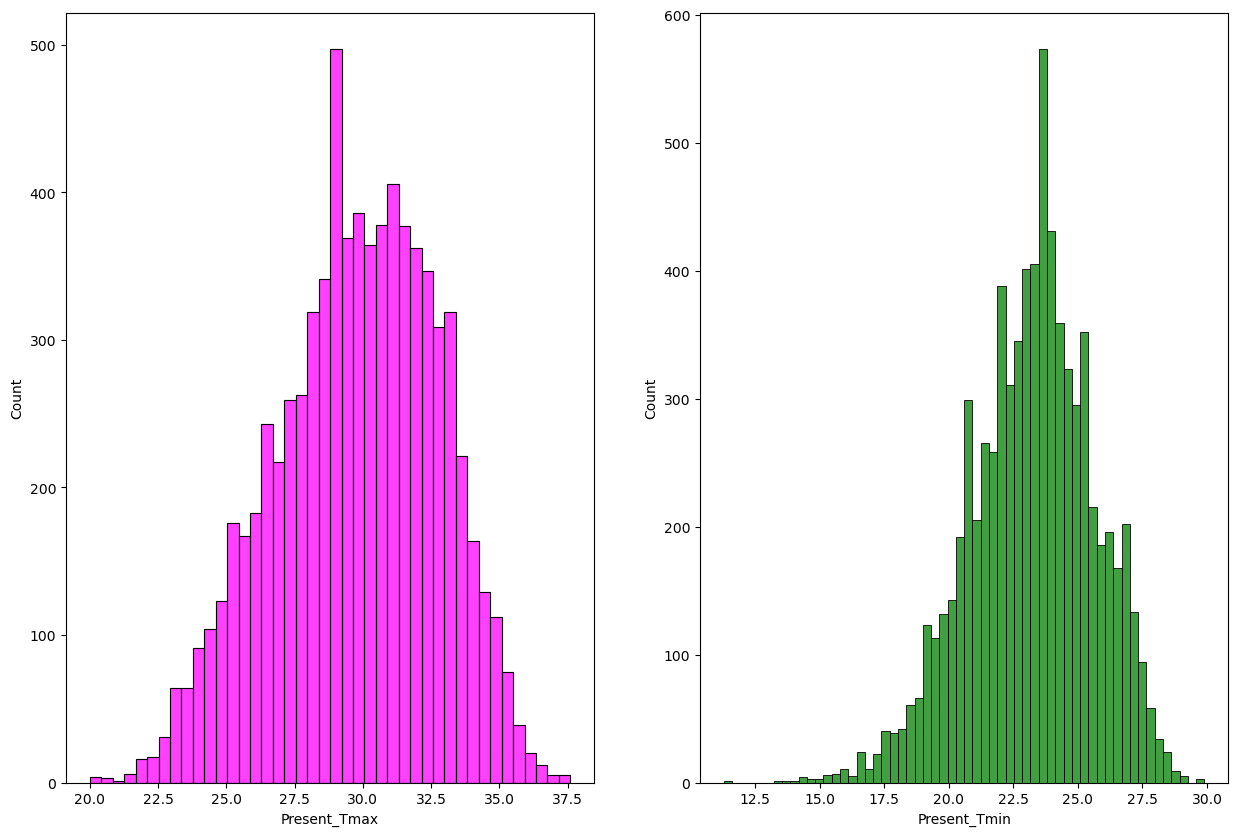

In [12]:
plt.figure(figsize=(15,10))
plt.subplot(1,2,1)
sns.histplot(data['Present_Tmax'], color= 'magenta')
plt.subplot(1,2,2)
sns.histplot(data['Present_Tmin'], color='green')
plt.show()

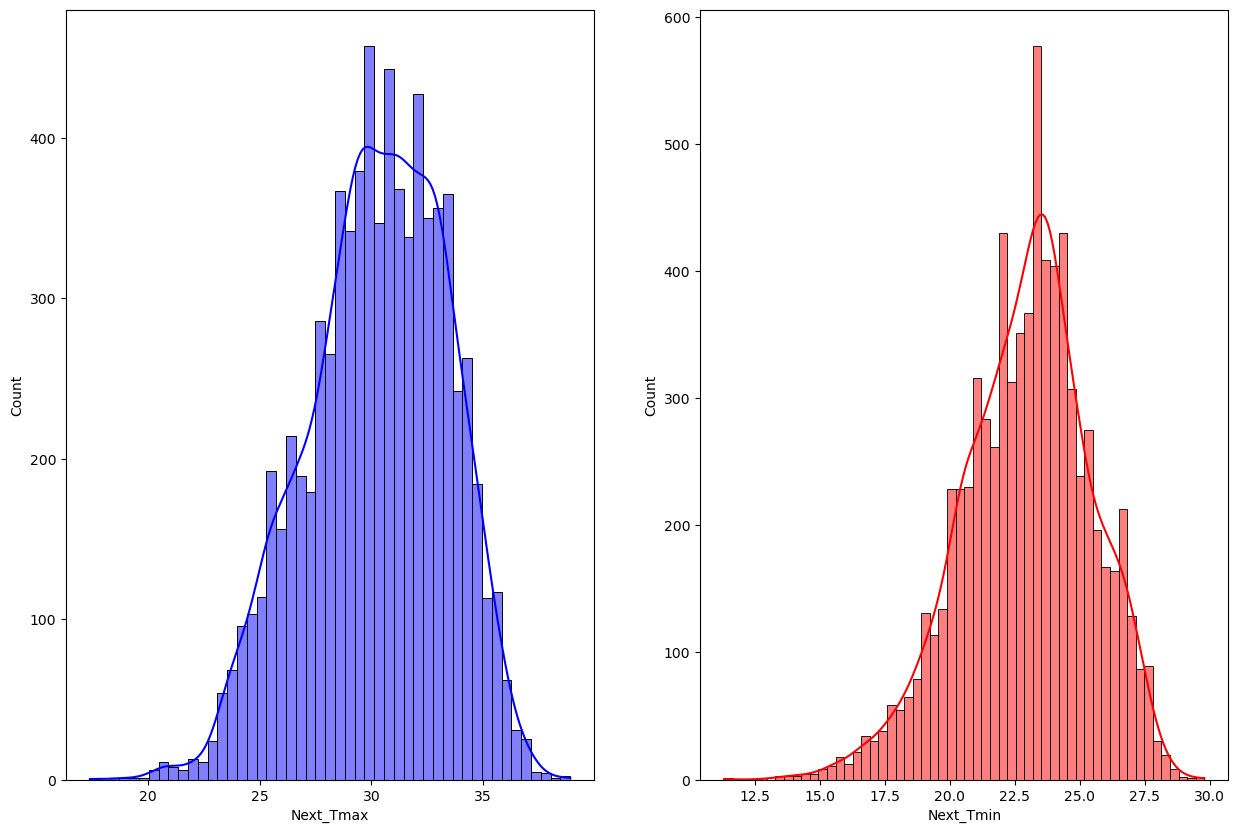

In [13]:
plt.figure(figsize=(15,10))
plt.subplot(1,2,1)
sns.histplot(data['Next_Tmax'],kde=True,color='b')
plt.subplot(1,2,2)
sns.histplot(data['Next_Tmin'],kde=True,color='r')
plt.show()

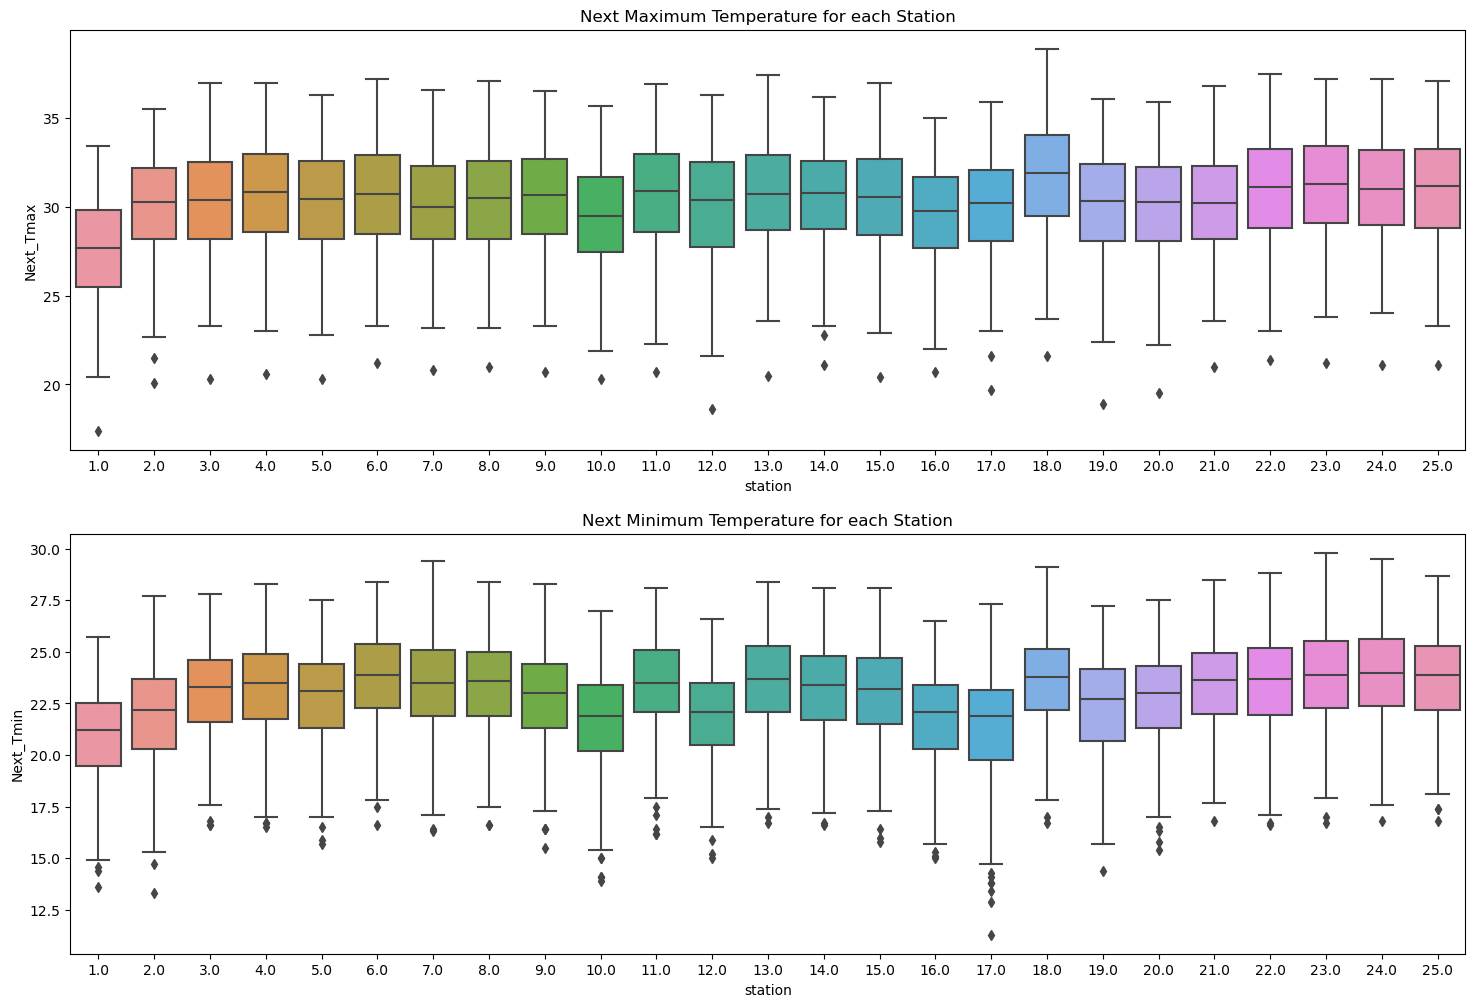

In [14]:
#Visualizing the realtion between station and next Max and min temperature variables
plt.figure(figsize=(18,12))
plt.subplot(2,1,1)
sns.boxplot(data['station'],data['Next_Tmax'],data=data)
plt.title('Next Maximum Temperature for each Station')
plt.subplot(2,1,2)
sns.boxplot(data['station'],data['Next_Tmin'],data=data)
plt.title('Next Minimum Temperature for each Station')
plt.show()

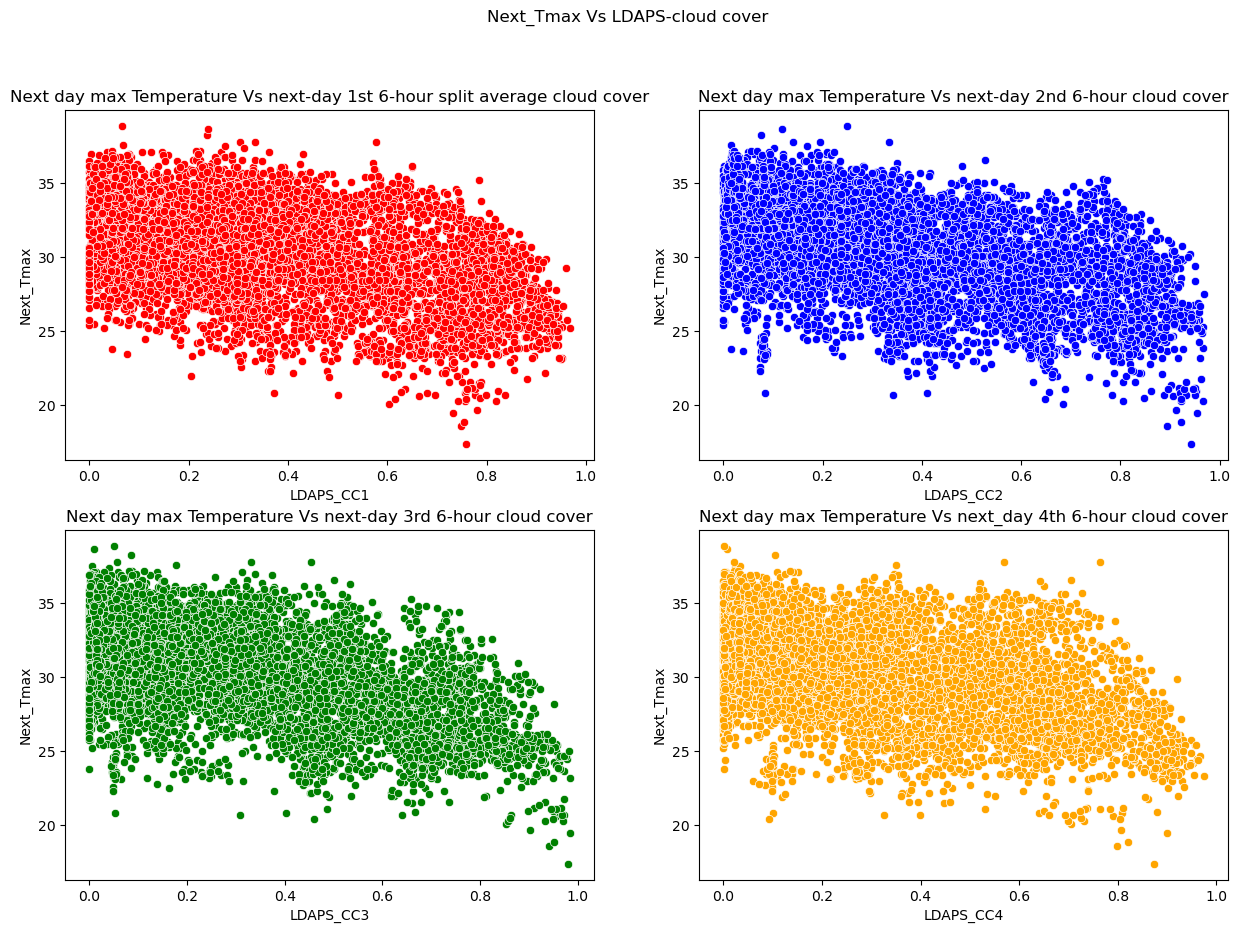

In [15]:
plt.figure(figsize=(15,10))
plt.suptitle('Next_Tmax Vs LDAPS-cloud cover')

plt.subplot(2,2,1)
plt.title('Next day max Temperature Vs next-day 1st 6-hour split average cloud cover')
sns.scatterplot(x='LDAPS_CC1',y='Next_Tmax',data=data,color="red")

plt.subplot(2,2,2)
plt.title('Next day max Temperature Vs next-day 2nd 6-hour cloud cover')
sns.scatterplot(x='LDAPS_CC2',y='Next_Tmax',data=data,color='blue')

plt.subplot(2,2,3)
plt.title('Next day max Temperature Vs next-day 3rd 6-hour cloud cover')
sns.scatterplot(x='LDAPS_CC3',y='Next_Tmax',data=data,color='green')

plt.subplot(2,2,4)
plt.title('Next day max Temperature Vs next_day 4th 6-hour cloud cover')
sns.scatterplot(x='LDAPS_CC4',y='Next_Tmax',data=data,color="orange")
plt.show()

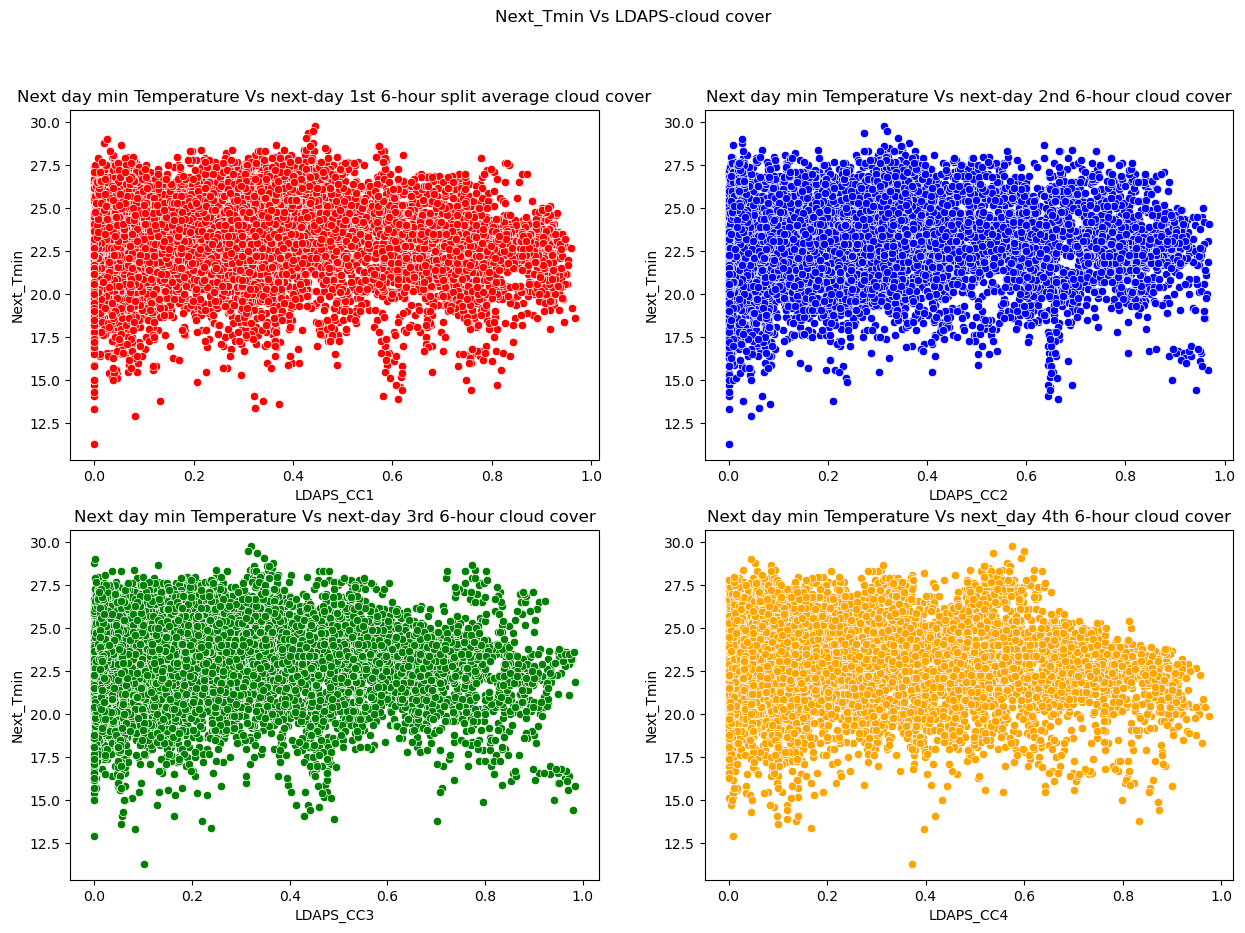

In [16]:
plt.figure(figsize=(15,10))
plt.suptitle('Next_Tmin Vs LDAPS-cloud cover')

plt.subplot(2,2,1)
plt.title('Next day min Temperature Vs next-day 1st 6-hour split average cloud cover')
sns.scatterplot(x='LDAPS_CC1',y='Next_Tmin',data=data,color="red")

plt.subplot(2,2,2)
plt.title('Next day min Temperature Vs next-day 2nd 6-hour cloud cover')
sns.scatterplot(x='LDAPS_CC2',y='Next_Tmin',data=data,color='blue')

plt.subplot(2,2,3)
plt.title('Next day min Temperature Vs next-day 3rd 6-hour cloud cover')
sns.scatterplot(x='LDAPS_CC3',y='Next_Tmin',data=data,color='green')

plt.subplot(2,2,4)
plt.title('Next day min Temperature Vs next_day 4th 6-hour cloud cover')
sns.scatterplot(x='LDAPS_CC4',y='Next_Tmin',data=data,color="orange")
plt.show()

In [17]:
#next day Tmax decreases as the quarter increases but the Tmin is unaffected

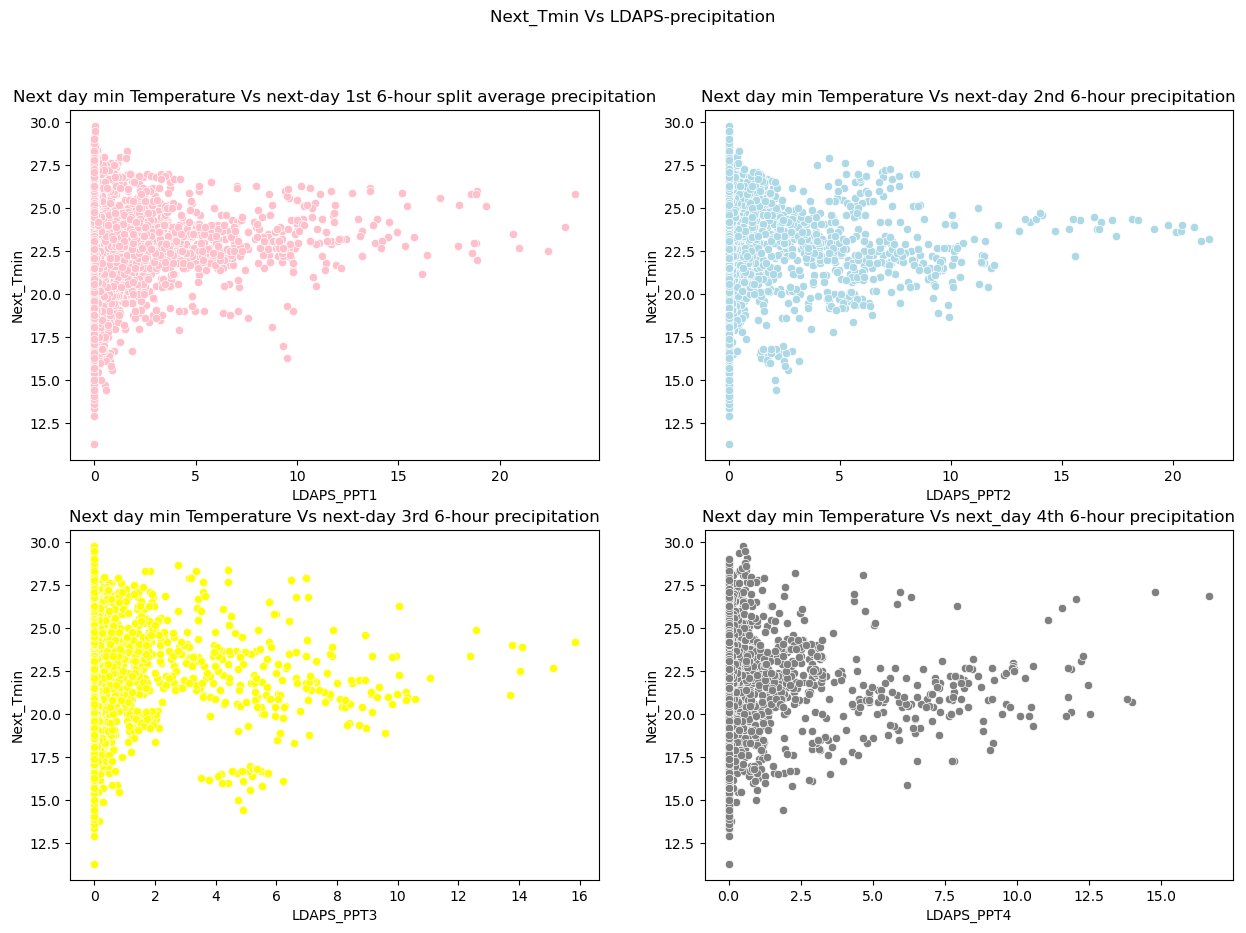

In [18]:
plt.figure(figsize=(15,10))
plt.suptitle('Next_Tmin Vs LDAPS-precipitation')

plt.subplot(2,2,1)
plt.title('Next day min Temperature Vs next-day 1st 6-hour split average precipitation')
sns.scatterplot(x='LDAPS_PPT1',y='Next_Tmin',data=data,color="pink")

plt.subplot(2,2,2)
plt.title('Next day min Temperature Vs next-day 2nd 6-hour precipitation')
sns.scatterplot(x='LDAPS_PPT2',y='Next_Tmin',data=data,color='lightblue')

plt.subplot(2,2,3)
plt.title('Next day min Temperature Vs next-day 3rd 6-hour precipitation')
sns.scatterplot(x='LDAPS_PPT3',y='Next_Tmin',data=data,color='yellow')

plt.subplot(2,2,4)
plt.title('Next day min Temperature Vs next_day 4th 6-hour precipitation')
sns.scatterplot(x='LDAPS_PPT4',y='Next_Tmin',data=data,color="grey")
plt.show()

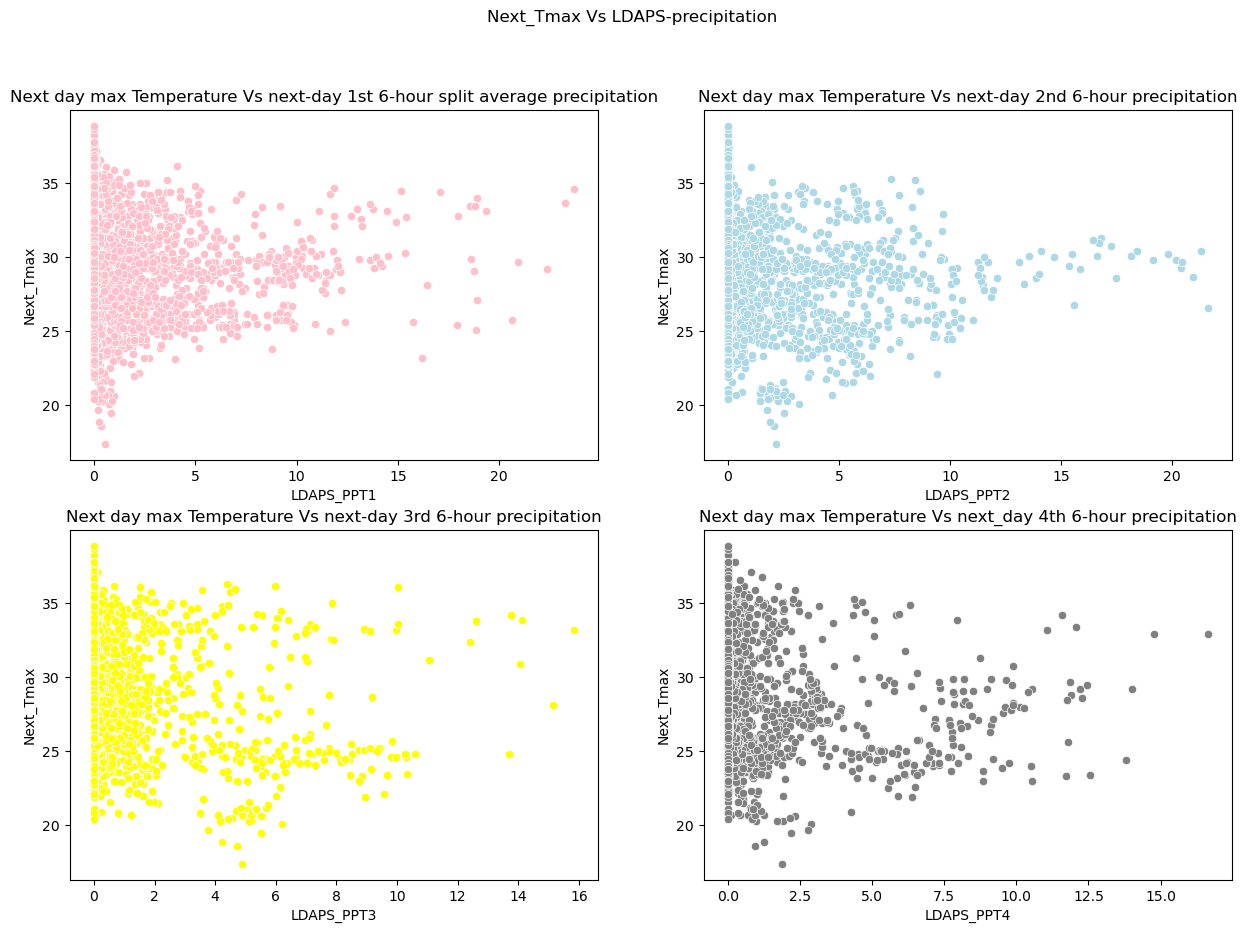

In [19]:
plt.figure(figsize=(15,10))
plt.suptitle('Next_Tmax Vs LDAPS-precipitation')

plt.subplot(2,2,1)
plt.title('Next day max Temperature Vs next-day 1st 6-hour split average precipitation')
sns.scatterplot(x='LDAPS_PPT1',y='Next_Tmax',data=data,color="pink")

plt.subplot(2,2,2)
plt.title('Next day max Temperature Vs next-day 2nd 6-hour precipitation')
sns.scatterplot(x='LDAPS_PPT2',y='Next_Tmax',data=data,color='lightblue')

plt.subplot(2,2,3)
plt.title('Next day max Temperature Vs next-day 3rd 6-hour precipitation')
sns.scatterplot(x='LDAPS_PPT3',y='Next_Tmax',data=data,color='yellow')

plt.subplot(2,2,4)
plt.title('Next day max Temperature Vs next_day 4th 6-hour precipitation')
sns.scatterplot(x='LDAPS_PPT4',y='Next_Tmax',data=data,color="grey")
plt.show()

<AxesSubplot:xlabel='Solar radiation', ylabel='Next_Tmax'>

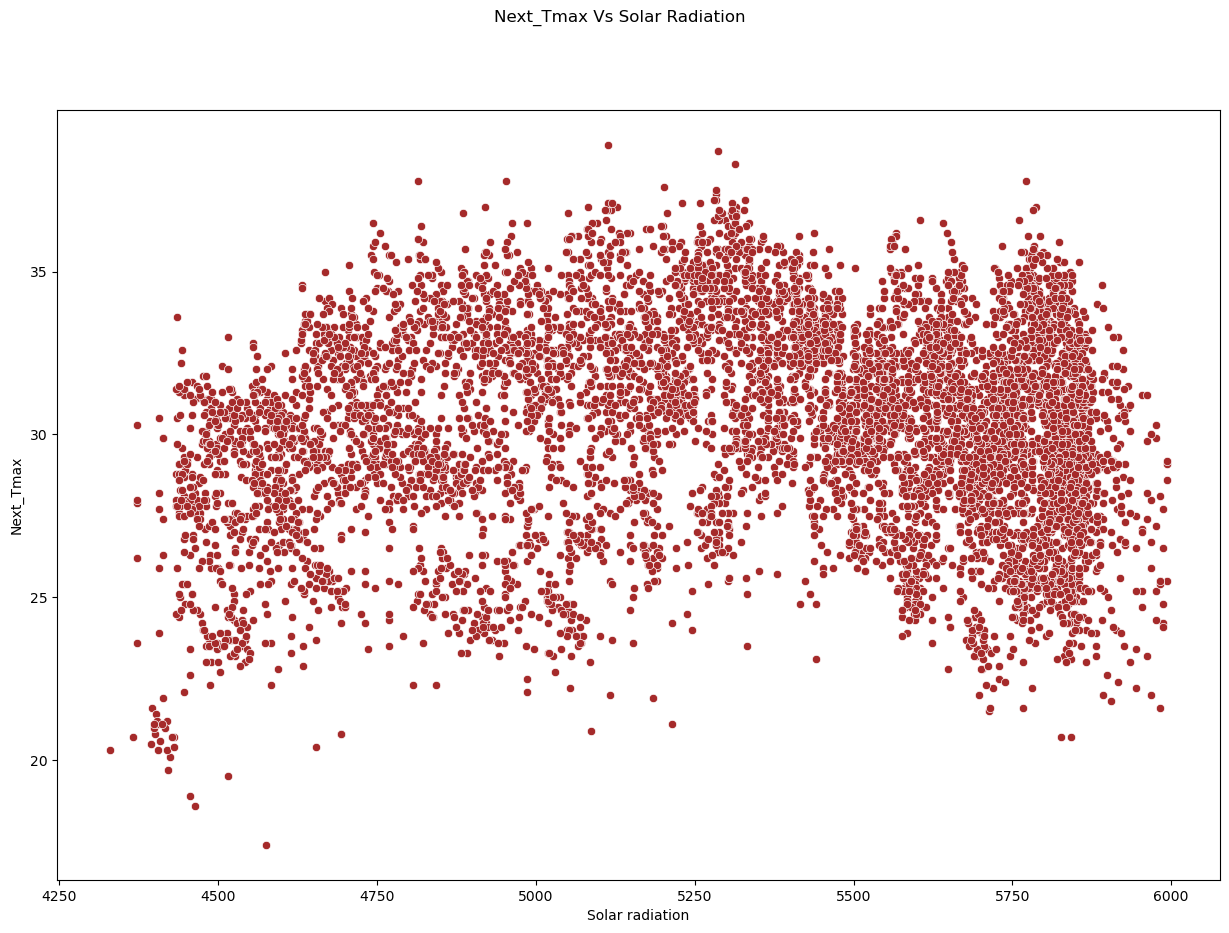

In [20]:
plt.figure(figsize=(15,10))
plt.suptitle('Next_Tmax Vs Solar Radiation')
sns.scatterplot(x='Solar radiation',y='Next_Tmax',data=data,color="brown")


<AxesSubplot:xlabel='Solar radiation', ylabel='Next_Tmin'>

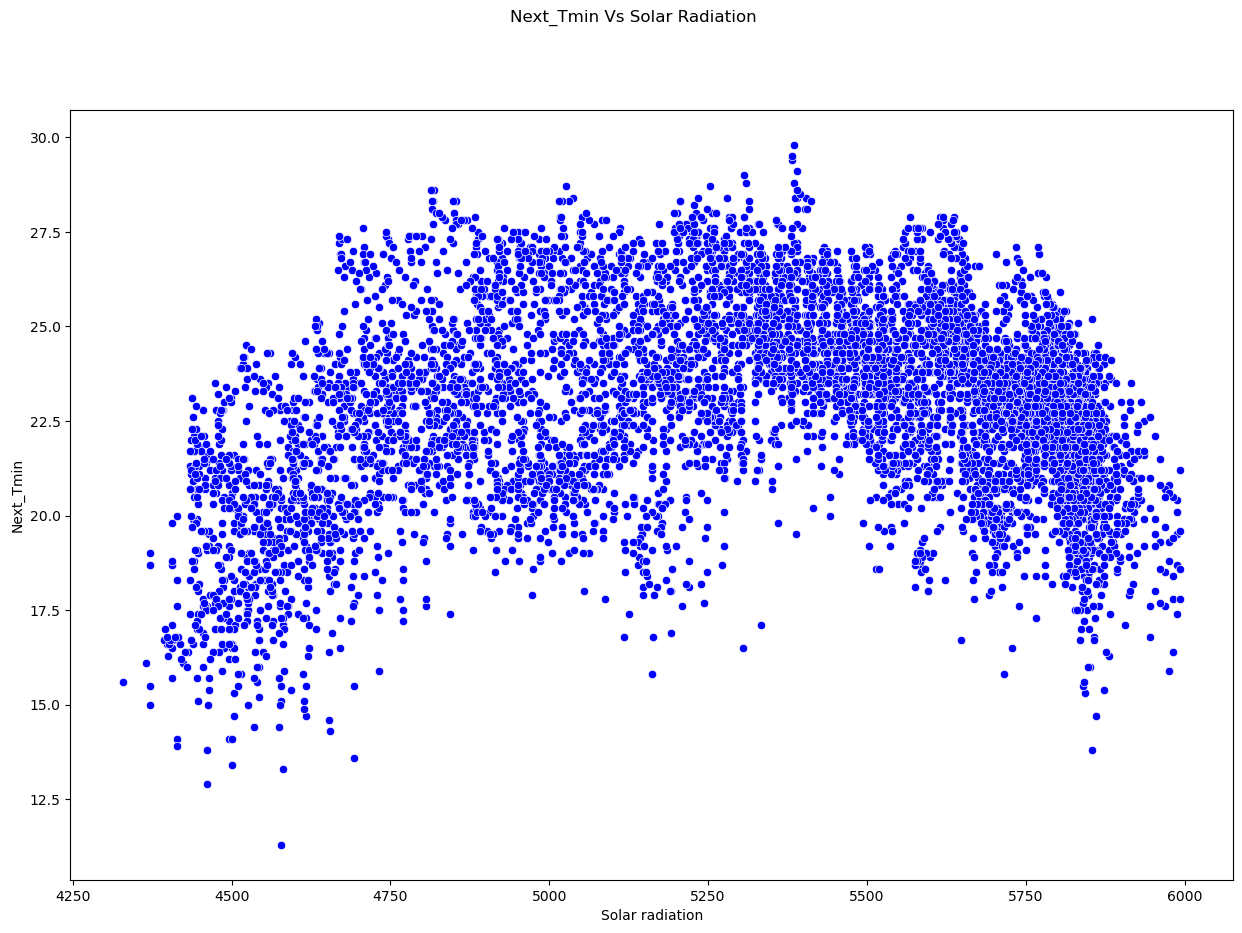

In [21]:
plt.figure(figsize=(15,10))
plt.suptitle('Next_Tmin Vs Solar Radiation')
sns.scatterplot(x='Solar radiation',y='Next_Tmin',data=data,color="blue")


In [22]:
#Tmax and Tmin are highest between the solar radiation range 4800 -5300

In [23]:
data.corr()

,station,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,LDAPS_CC1,...,lat,lon,DEM,Slope,Solar radiation,Next_Tmax,Next_Tmin,Day,Month,Year
station,1.000000,0.113301,0.133282,-0.067846,-0.169351,0.069856,0.105277,0.005822,-0.132129,0.006539,...,-0.239118,-0.118845,-0.256706,-0.091721,-0.021194,0.107747,0.128184,-0.000996,0.001211,0.001474
Present_Tmax,0.113301,1.000000,0.615208,-0.209059,-0.306943,0.573777,0.628705,-0.125952,0.134246,-0.316333,...,-0.054134,0.007695,-0.189439,-0.107079,-0.022114,0.610357,0.621048,-0.154366,-0.003266,0.056002
Present_Tmin,0.133282,0.615208,1.000000,0.122200,-0.018576,0.467904,0.772061,-0.038779,-0.012817,0.084348,...,-0.081417,-0.045174,-0.254084,-0.148423,0.059765,0.463523,0.796975,-0.115693,-0.010210,0.037457
LDAPS_RHmin,-0.067846,-0.209059,0.122200,1.000000,0.578358,-0.569580,0.085237,0.289422,-0.072195,0.612831,...,0.085027,-0.077590,0.100684,0.122454,0.242168,-0.446824,0.093249,-0.063464,-0.053499,-0.002147
LDAPS_RHmax,-0.169351,-0.306943,-0.018576,0.578358,1.000000,-0.377293,-0.118965,0.131269,0.238986,0.435937,...,0.194820,0.025563,0.176557,0.219436,0.146622,-0.289788,-0.076415,-0.012226,-0.039424,-0.144286
LDAPS_Tmax_lapse,0.069856,0.573777,0.467904,-0.569580,-0.377293,1.000000,0.653425,-0.316011,0.043663,-0.440878,...,-0.044052,0.091568,-0.181433,-0.163891,0.047414,0.835729,0.589963,-0.161320,-0.022279,0.020308
LDAPS_Tmin_lapse,0.105277,0.628705,0.772061,0.085237,-0.118965,0.653425,1.000000,-0.134652,-0.139675,0.008714,...,-0.099452,-0.024703,-0.198396,-0.187864,0.157763,0.592119,0.886513,-0.176772,-0.027050,-0.000564
LDAPS_WS,0.005822,-0.125952,-0.038779,0.289422,0.131269,-0.316011,-0.134652,1.000000,0.004427,0.285349,...,0.033025,-0.063009,0.188540,0.169223,0.120630,-0.351107,-0.102021,-0.028312,-0.082267,-0.114114
LDAPS_LH,-0.132129,0.134246,-0.012817,-0.072195,0.238986,0.043663,-0.139675,0.004427,1.000000,-0.148314,...,0.133309,0.024476,0.056362,0.087517,-0.044956,0.156779,-0.060392,-0.010504,-0.024944,0.055898
LDAPS_CC1,0.006539,-0.316333,0.084348,0.612831,0.435937,-0.440878,0.008714,0.285349,-0.148314,1.000000,...,-0.010268,-0.007962,-0.017378,-0.023893,0.218285,-0.459705,-0.012877,-0.018974,-0.076819,-0.066233


<AxesSubplot:>

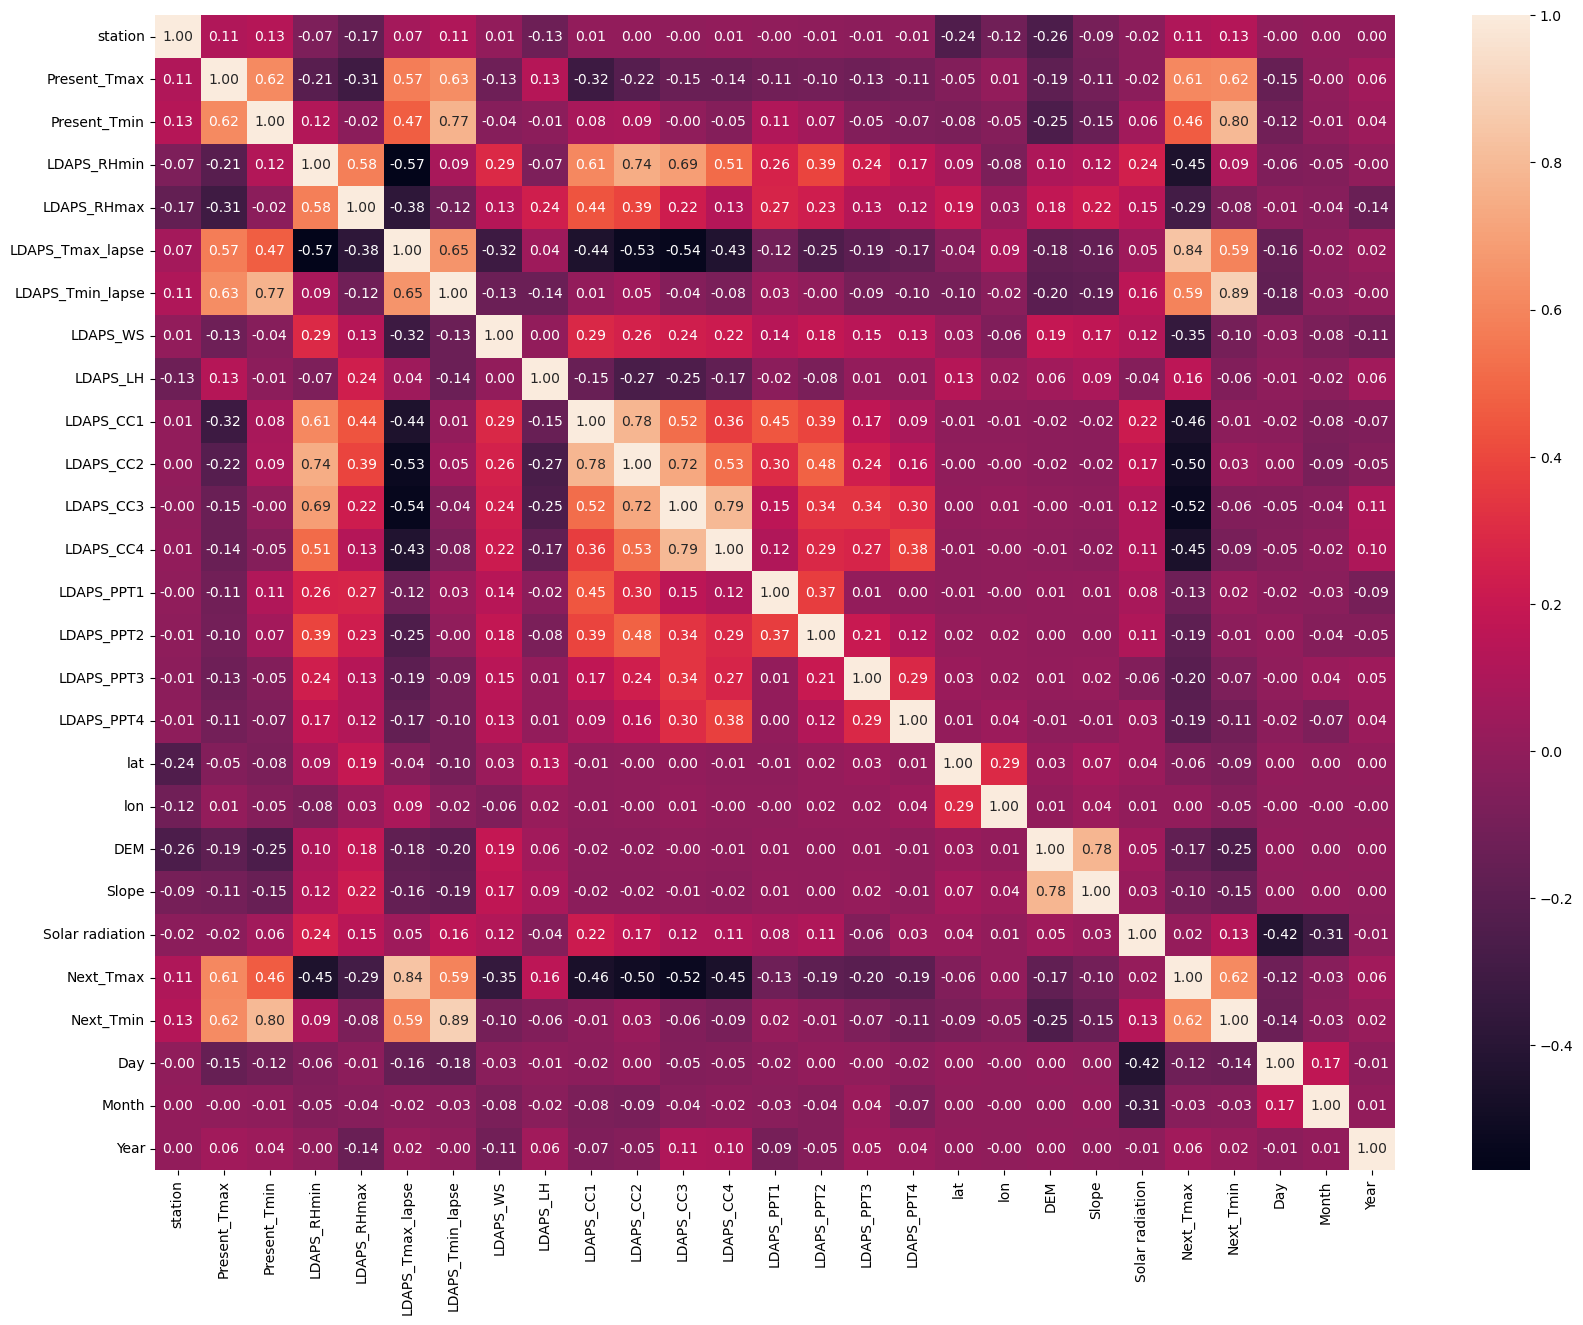

In [24]:
plt.figure(figsize=(20,15))
sns.heatmap(data.corr(), annot=True, fmt='0.2f')

In [25]:
data.drop(['Date'], axis=1, inplace=True)

In [26]:
data.head()

,station,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,LDAPS_CC1,...,lat,lon,DEM,Slope,Solar radiation,Next_Tmax,Next_Tmin,Day,Month,Year
0,1.0,28.7,21.4,58.255688,91.116364,28.074101,23.006936,6.818887,69.451805,0.233947,...,37.6046,126.991,212.3350,2.7850,5992.895996,29.1,21.2,30,6,2013
1,2.0,31.9,21.6,52.263397,90.604721,29.850689,24.035009,5.691890,51.937448,0.225508,...,37.6046,127.032,44.7624,0.5141,5869.312500,30.5,22.5,30,6,2013
2,3.0,31.6,23.3,48.690479,83.973587,30.091292,24.565633,6.138224,20.573050,0.209344,...,37.5776,127.058,33.3068,0.2661,5863.555664,31.1,23.9,30,6,2013
3,4.0,32.0,23.4,58.239788,96.483688,29.704629,23.326177,5.650050,65.727144,0.216372,...,37.6450,127.022,45.7160,2.5348,5856.964844,31.7,24.3,30,6,2013
4,5.0,31.4,21.9,56.174095,90.155128,29.113934,23.486480,5.735004,107.965535,0.151407,...,37.5507,127.135,35.0380,0.5055,5859.552246,31.2,22.5,30,6,2013


# Model Building for Next_Tmax

In [27]:
X=data.drop('Next_Tmax', axis=1)
y=data['Next_Tmax']

In [28]:
X

,station,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,LDAPS_CC1,...,LDAPS_PPT4,lat,lon,DEM,Slope,Solar radiation,Next_Tmin,Day,Month,Year
0,1.0,28.7,21.4,58.255688,91.116364,28.074101,23.006936,6.818887,69.451805,0.233947,...,0.0,37.6046,126.991,212.3350,2.7850,5992.895996,21.2,30,6,2013
1,2.0,31.9,21.6,52.263397,90.604721,29.850689,24.035009,5.691890,51.937448,0.225508,...,0.0,37.6046,127.032,44.7624,0.5141,5869.312500,22.5,30,6,2013
2,3.0,31.6,23.3,48.690479,83.973587,30.091292,24.565633,6.138224,20.573050,0.209344,...,0.0,37.5776,127.058,33.3068,0.2661,5863.555664,23.9,30,6,2013
3,4.0,32.0,23.4,58.239788,96.483688,29.704629,23.326177,5.650050,65.727144,0.216372,...,0.0,37.6450,127.022,45.7160,2.5348,5856.964844,24.3,30,6,2013
4,5.0,31.4,21.9,56.174095,90.155128,29.113934,23.486480,5.735004,107.965535,0.151407,...,0.0,37.5507,127.135,35.0380,0.5055,5859.552246,22.5,30,6,2013
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7745,21.0,23.1,17.8,24.688997,78.261383,27.812697,18.303014,6.603253,9.614074,0.052902,...,0.0,37.5507,127.040,26.2980,0.5721,4456.024414,17.7,30,8,2017
7746,22.0,22.5,17.4,30.094858,83.690018,26.704905,17.814038,5.768083,82.146707,0.066461,...,0.0,37.5102,127.086,21.9668,0.1332,4441.803711,17.1,30,8,2017
7747,23.0,23.3,17.1,26.741310,78.869858,26.352081,18.775678,6.148918,72.058294,0.030034,...,0.0,37.5372,126.891,15.5876,0.1554,4443.313965,18.1,30,8,2017
7748,24.0,23.3,17.7,24.040634,77.294975,27.010193,18.733519,6.542819,47.241457,0.035874,...,0.0,37.5237,126.909,17.2956,0.2223,4438.373535,18.8,30,8,2017


In [29]:
y

0       29.1
1       30.5
2       31.1
3       31.7
4       31.2
        ... 
7745    27.6
7746    28.0
7747    28.3
7748    28.6
7749    27.8
Name: Next_Tmax, Length: 7588, dtype: float64

In [30]:
X.shape, y.shape

((7588, 26), (7588,))

# Finding Best Random State

In [31]:
maxr2_score=0
best_random_state=0
for i in range(1,200):
    X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=i, test_size=.2)
    lin_reg=LinearRegression()
    lin_reg.fit(X_train,y_train)
    y_pred=lin_reg.predict(X_test)
    R2=r2_score(y_test,y_pred)
    if R2>maxr2_score:
        maxr2_score=R2
        best_random_state=i
print('Best R2 Score is', maxr2_score ,'on Random_state', best_random_state)

Best R2 Score is 0.8228821511265572 on Random_state 30


In [32]:
X_train, X_test, y_train, y_test=train_test_split(X, y, test_size=0.2, random_state=30)

# Linear Regression

In [33]:
linreg=LinearRegression()
linreg.fit(X_train, y_train)
lr_pred = linreg.predict(X_test)
lr_score=r2_score(y_test, lr_pred)
lr_mse=mean_squared_error(y_test, lr_pred )
lr_rmse=lr_mse**0.5
print(lr_score, lr_mse, lr_rmse)

0.8228821511265572 1.7489557906565183 1.3224809226058871


# Random Forest regressor

In [34]:
rfc=RandomForestRegressor()
rfc.fit(X_train, y_train)
rfc_pred = rfc.predict(X_test)
rfc_score=r2_score(y_test, rfc_pred)
rfc_mse=mean_squared_error(y_test, rfc_pred )
rfc_rmse=rfc_mse**0.5
print(rfc_score, rfc_mse, rfc_rmse)

0.9246786214334338 0.7437633306982867 0.8624171442511371


# Decision Tree Regressor

In [35]:
dtr=DecisionTreeRegressor()
dtr.fit(X_train, y_train)
dtr_pred = dtr.predict(X_test)
dtr_score=r2_score(y_test, dtr_pred)
dtr_mse=mean_squared_error(y_test, dtr_pred )
dtr_rmse=dtr_mse**0.5
print(dtr_score, dtr_mse, dtr_rmse)

0.7978396790644695 1.9962384716732546 1.412883035383062


# Gradient Boosting Regressor

In [36]:
gbr=GradientBoostingRegressor()
gbr.fit(X_train, y_train)
gbr_pred = gbr.predict(X_test)
gbr_score=r2_score(y_test, gbr_pred)
gbr_mse=mean_squared_error(y_test, gbr_pred )
gbr_rmse=gbr_mse**0.5
print( gbr_score, gbr_mse, gbr_rmse)

0.8851213824531341 1.1343725359083907 1.0650692634323793


# Ada Boost Regressor

In [37]:
abr=AdaBoostRegressor()
abr.fit(X_train, y_train)
abr_pred = abr.predict(X_test)
abr_score=r2_score(y_test, abr_pred)
abr_mse=mean_squared_error(y_test, abr_pred )
abr_rmse=abr_mse**0.5
print(abr_score, abr_mse, abr_rmse)

0.7628635333242884 2.3416115270497664 1.5302325075130794


# XGB Regressor

In [38]:
xgb=XGBRegressor()
xgb.fit(X_train, y_train)
xgb_pred = xgb.predict(X_test)
xgb_score=r2_score(y_test, xgb_pred)
xgb_mse=mean_squared_error(y_test, xgb_pred )
xgb_rmse=xgb_mse**0.5
print(xgb_score, xgb_mse, xgb_rmse)

0.9387185063471895 0.6051260438508752 0.7778984791416391


In [39]:
model_Tmax=pd.DataFrame({'Model':['Linear regression', 'Random forest', 'Decision Tree', 'Gradient Boosting', 'Ada Boost', 'XGB'], 'R2_Score':[lr_score, rfc_score, dtr_score, gbr_score, abr_score, xgb_score], 'Root mean squared error':[lr_rmse, rfc_rmse, dtr_rmse, gbr_rmse, abr_rmse, xgb_rmse]})
model_Tmax

,Model,R2_Score,Root mean squared error
0,Linear regression,0.822882,1.322481
1,Random forest,0.924679,0.862417
2,Decision Tree,0.797840,1.412883
3,Gradient Boosting,0.885121,1.065069
4,Ada Boost,0.762864,1.530233
5,XGB,0.938719,0.777898


In [40]:
#XGBoost is the best model for prediction

In [41]:
actual=np.array(y_test)
predicted=np.array(xgb.predict(X_test))
df_predicted=pd.DataFrame({"Actual Values":actual, "Predicted Values":predicted}, index= range(len(actual)))
df_predicted

,Actual Values,Predicted Values
0,36.1,33.784271
1,30.5,30.112394
2,35.1,35.454170
3,37.0,35.604504
4,33.9,34.701881
...,...,...
1513,25.4,25.667879
1514,26.6,27.316259
1515,28.3,28.551453
1516,31.6,31.210417


# Model Building for Next_Tmin

In [42]:
X1=data.drop('Next_Tmin', axis=1)
y1=data['Next_Tmin']

In [43]:
X1

,station,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,LDAPS_CC1,...,LDAPS_PPT4,lat,lon,DEM,Slope,Solar radiation,Next_Tmax,Day,Month,Year
0,1.0,28.7,21.4,58.255688,91.116364,28.074101,23.006936,6.818887,69.451805,0.233947,...,0.0,37.6046,126.991,212.3350,2.7850,5992.895996,29.1,30,6,2013
1,2.0,31.9,21.6,52.263397,90.604721,29.850689,24.035009,5.691890,51.937448,0.225508,...,0.0,37.6046,127.032,44.7624,0.5141,5869.312500,30.5,30,6,2013
2,3.0,31.6,23.3,48.690479,83.973587,30.091292,24.565633,6.138224,20.573050,0.209344,...,0.0,37.5776,127.058,33.3068,0.2661,5863.555664,31.1,30,6,2013
3,4.0,32.0,23.4,58.239788,96.483688,29.704629,23.326177,5.650050,65.727144,0.216372,...,0.0,37.6450,127.022,45.7160,2.5348,5856.964844,31.7,30,6,2013
4,5.0,31.4,21.9,56.174095,90.155128,29.113934,23.486480,5.735004,107.965535,0.151407,...,0.0,37.5507,127.135,35.0380,0.5055,5859.552246,31.2,30,6,2013
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7745,21.0,23.1,17.8,24.688997,78.261383,27.812697,18.303014,6.603253,9.614074,0.052902,...,0.0,37.5507,127.040,26.2980,0.5721,4456.024414,27.6,30,8,2017
7746,22.0,22.5,17.4,30.094858,83.690018,26.704905,17.814038,5.768083,82.146707,0.066461,...,0.0,37.5102,127.086,21.9668,0.1332,4441.803711,28.0,30,8,2017
7747,23.0,23.3,17.1,26.741310,78.869858,26.352081,18.775678,6.148918,72.058294,0.030034,...,0.0,37.5372,126.891,15.5876,0.1554,4443.313965,28.3,30,8,2017
7748,24.0,23.3,17.7,24.040634,77.294975,27.010193,18.733519,6.542819,47.241457,0.035874,...,0.0,37.5237,126.909,17.2956,0.2223,4438.373535,28.6,30,8,2017


In [44]:
y1

0       21.2
1       22.5
2       23.9
3       24.3
4       22.5
        ... 
7745    17.7
7746    17.1
7747    18.1
7748    18.8
7749    17.4
Name: Next_Tmin, Length: 7588, dtype: float64

In [45]:
X1.shape, y1.shape

((7588, 26), (7588,))

# Finding Best Random State

In [46]:
maxr2_score1=0
best_random_state1=0
for i in range(1,200):
    X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, random_state=i, test_size=.2)
    lin_reg=LinearRegression()
    lin_reg.fit(X1_train,y1_train)
    y_pred1=lin_reg.predict(X1_test)
    R2_1=r2_score(y1_test,y_pred1)
    if R2_1>maxr2_score1:
        maxr2_score1=R2_1
        best_random_state1=i
print('Best R2 Score is', maxr2_score1 ,'on Random_state', best_random_state1)

Best R2 Score is 0.8701726771799063 on Random_state 103


In [47]:
X1_train, X1_test, y1_train, y1_test=train_test_split(X1, y1, test_size=0.2, random_state=103)

# Linear Regression

In [48]:
linreg1=LinearRegression()
linreg1.fit(X1_train, y1_train)
lr1_pred = linreg1.predict(X1_test)
lr1_score=r2_score(y1_test, lr1_pred)
lr1_mse=mean_squared_error(y1_test, lr1_pred )
lr1_rmse=lr1_mse**0.5
print(lr1_score, lr1_mse, lr1_rmse)

0.8701726771799063 0.8307201134072767 0.91143848580542


# Random Forest regressor

In [49]:
rfc1=RandomForestRegressor()
rfc1.fit(X1_train, y1_train)
rfc1_pred = rfc1.predict(X1_test)
rfc1_score=r2_score(y1_test, rfc1_pred)
rfc1_mse=mean_squared_error(y1_test, rfc1_pred)
rfc1_rmse=rfc1_mse**0.5
print(rfc1_score, rfc1_mse, rfc1_rmse)

0.9239731727968129 0.48646935902503313 0.6974735543553126


In [50]:
dtr1=DecisionTreeRegressor()
dtr1.fit(X1_train, y1_train)
dtr1_pred = dtr1.predict(X1_test)
dtr1_score=r2_score(y1_test, dtr1_pred)
dtr1_mse=mean_squared_error(y1_test, dtr1_pred)
dtr1_rmse=dtr1_mse**0.5
print(dtr1_score, dtr1_mse, dtr1_rmse)

0.8164685227764861 1.17435441370224 1.0836763417654922


# Gradient Boosting Regressor

In [51]:
gbr1=GradientBoostingRegressor()
gbr1.fit(X1_train, y1_train)
gbr1_pred = gbr1.predict(X1_test)
gbr1_score=r2_score(y1_test, gbr1_pred)
gbr1_mse=mean_squared_error(y1_test, gbr1_pred )
gbr1_rmse=gbr1_mse**0.5
print( gbr1_score, gbr1_mse, gbr1_rmse)

0.9141995342003708 0.5490074903434233 0.7409503966821418


# Ada Boost Regressor

In [52]:
abr1=AdaBoostRegressor()
abr1.fit(X1_train, y1_train)
abr1_pred = abr1.predict(X1_test)
abr1_score=r2_score(y1_test, abr1_pred)
abr1_mse=mean_squared_error(y1_test, abr1_pred )
abr1_rmse=abr1_mse**0.5
print(abr1_score, abr1_mse, abr1_rmse)

0.8326099122492174 1.0710712480166946 1.0349257210141676


# XGB Regressor

In [53]:
xgb1=XGBRegressor()
xgb1.fit(X1_train, y1_train)
xgb1_pred = xgb1.predict(X1_test)
xgb1_score=r2_score(y1_test, xgb1_pred)
xgb1_mse=mean_squared_error(y1_test, xgb1_pred )
xgb1_rmse=xgb1_mse**0.5
print(xgb1_score, xgb1_mse, xgb1_rmse)

0.9435244853508976 0.3613672755083219 0.6011383164533116


In [54]:
model_Tmin=pd.DataFrame({'Model':['Linear regression', 'Random forest', 'Decision Tree', 'Gradient Boosting', 'Ada Boost', 'XGB'], 'R2_Score':[lr1_score, rfc1_score, dtr1_score, gbr1_score, abr1_score, xgb1_score], 'Root mean squared error':[lr1_rmse, rfc1_rmse, dtr1_rmse, gbr1_rmse, abr1_rmse, xgb1_rmse]})
model_Tmin

,Model,R2_Score,Root mean squared error
0,Linear regression,0.870173,0.911438
1,Random forest,0.923973,0.697474
2,Decision Tree,0.816469,1.083676
3,Gradient Boosting,0.914200,0.740950
4,Ada Boost,0.832610,1.034926
5,XGB,0.943524,0.601138


In [55]:
#XGBoost is the best model for prediction

In [56]:
actual1=np.array(y1_test)
predicted1=np.array(xgb1.predict(X1_test))
df_predicted1=pd.DataFrame({"Actual Values":actual1, "Predicted Values":predicted1}, index= range(len(actual1)))
df_predicted1

,Actual Values,Predicted Values
0,21.7,22.112404
1,25.0,26.174961
2,19.4,18.256224
3,26.0,25.492889
4,21.8,21.758141
...,...,...
1513,23.5,23.463659
1514,24.6,24.681778
1515,24.0,23.508263
1516,21.6,22.065359
